### Income Measures from Census

Typically annual data such as from the ACS and CPS ASEC

In [1]:
import sys
sys.path.append('../src')

import uschartbook.config

from uschartbook.config import *
from uschartbook.utils import *

Total percent change in personal income, 2019 vs 2018:  6.89%
                                                 ContribP  ContribM  Contrib
Name                                                                        
Total                                                1.36      5.46     6.89
Earnings                                             1.06      2.56     3.65
Unemployment compensation                            0.01      0.01     0.02
Workers' compensation                                0.02      0.02     0.04
Social Security                                      0.15      0.30     0.45
SSI (Supplemental Security Income)                  -0.02      0.01    -0.01
Public assistance                                   -0.00      0.01     0.01
Veterans' benefits                                   0.01      0.07     0.09
Survivor benefits                                    0.01     -0.02    -0.01
Disability benefits                                  0.03      0.01     0.04
Retirement inc

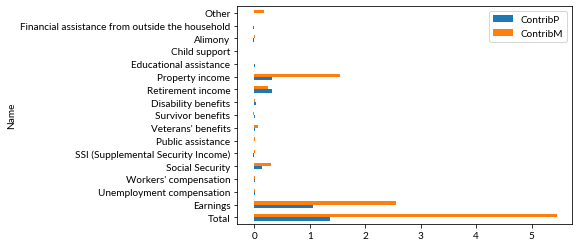

In [7]:
# Table made manually from combining PINC-09 from 2019 and 2018
df = (pd.read_csv('../data/pinc-09-2019-2018.csv', index_col='Name')
        .drop(['Wages and salary', 'Nonfarm self-employment']))
df['Mean2018'] = df['Mean2018'] * (376.5/369.8)
for year in [2019, 2018]:
    df[f'Total{year}'] = df[f'Number{year}'] * df[f'Mean{year}']
    
df['PctCh'] = ((df['Total2019'] / df['Total2018']) - 1) * 100
df['LvlCh'] = df['Total2019'] - df['Total2018']
df['LvlChP'] = (df['Number2019'] * df['Mean2018']) - df['Total2018']
df['LvlChM'] = (df['Number2018'] * df['Mean2019']) - df['Total2018']
df['ContribP'] = (df['LvlChP'] / df.loc['Total', 'LvlCh']) * df.loc['Total', 'PctCh']
df['ContribM'] = (df['LvlChM'] / df.loc['Total', 'LvlCh']) * df.loc['Total', 'PctCh']
df['Contrib'] = (df['LvlCh'] / df.loc['Total', 'LvlCh']) * df.loc['Total', 'PctCh']
print('Total percent change in personal income, 2019 vs 2018: ', f"{df.loc['Total', 'PctCh']:.2f}%")
print(df[['ContribP', 'ContribM', 'Contrib']].round(2))
df[['ContribP', 'ContribM']].plot(kind='barh');

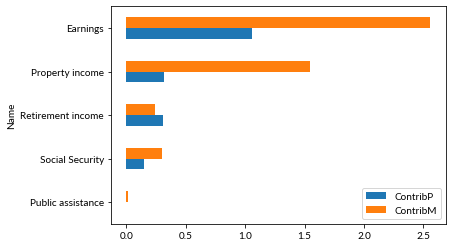

In [11]:
df.loc[['Public assistance', 'Social Security', 'Retirement income', 'Property income', 'Earnings'], ['ContribP', 'ContribM']].plot(kind='barh');

In [13]:
df.drop(['Total']).Number2019 / df.loc['Total', 'Number2019']

Name
Earnings                                           0.721665
Unemployment compensation                          0.014216
Workers' compensation                              0.006311
Social Security                                    0.233688
SSI (Supplemental Security Income)                 0.024289
Public assistance                                  0.005878
Veterans' benefits                                 0.018726
Survivor benefits                                  0.013587
Disability benefits                                0.011598
Retirement income                                  0.130608
Property income                                    0.620612
Educational assistance                             0.033354
Child support                                      0.016099
Alimony                                            0.000918
Financial assistance from outside the household    0.010995
Other                                              0.010230
Name: Number2019, dtype: float64